In [18]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

In [19]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [20]:
data.shape[0]

25

In [23]:
x=data[:,:-1]
x

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [5]:
y=data[:,-1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [14]:
import numpy as np

def mini_batch_adam(x, y, alpha=0.01, batch=5, epochs=100, b1=0.9, b2=0.999, eps=1e-8):
    X = np.concatenate((np.ones(x.shape[0])[:, np.newaxis], x), axis=1)
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    m_t = np.zeros(n_features)
    v_t = np.zeros(n_features)
    cost_epoch=[]
    shuffle = np.random.permutation(n_samples)
    X = X[shuffle]
    y = y[shuffle]
    for epoch in range(epochs):
        for i in range(0, n_samples, batch):
            X_batch = X[i:i+batch]
            y_batch = y[i:i+batch]
            y_pred = np.dot(X_batch, theta)
            error = y_pred - y_batch
            cost = np.sum(error ** 2) / (2 * batch)
            d_theta = np.dot(X_batch.T, error) / batch
            m_t = b1 * m_t + (1 - b1) * d_theta
            v_t = b2 * v_t + (1 - b2) * (d_theta ** 2)
            m_t_hat = m_t / (1 - b1 ** (i+1))
            v_t_hat = v_t / (1 - b2 ** (i+1))
            theta -= ((alpha) / ((np.sqrt(v_t_hat)) + eps) * m_t_hat)
        cost_epoch.append(cost)
        if epoch > 0:
            if  np.linalg.norm(d_theta)<.001 or abs(cost_epoch[-1] - cost_epoch[-2]) < 0.001:
                y_pred = np.dot(X, theta)
                break
            y_pred = np.dot(X, theta)
    print("Epochs: ",epoch+1,'\n')
    print("Grgint victor: ",d_theta.reshape(-1,1),'\n')
    print("y_predict: ",y_pred.reshape(-1,1),"\n")
    print("y: ",y.reshape(-1,1),"\n")
    print("Accuracy: ",r2_score(y,y_pred),"\n")
    plt.plot(cost_epoch,".b-")
    plt.xlabel("Epocs", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()

Epochs:  88 

Grgint victor:  [[ -0.98525191]
 [-52.10444269]
 [-51.71796667]
 [-70.32408209]] 

y_predict:  [[178.24819748]
 [179.54198614]
 [187.65568233]
 [156.66646962]
 [153.99757233]
 [104.26900942]
 [182.25093386]
 [188.28966863]
 [141.23352867]
 [141.26043214]
 [172.87109376]
 [184.95452722]
 [155.31047186]
 [149.32798228]
 [191.66973697]
 [173.53320265]
 [166.13067751]
 [198.40466715]
 [174.20784894]
 [149.26102838]
 [143.26234403]
 [160.71400121]
 [110.33038072]
 [160.12372271]
 [148.65028817]] 

y:  [[183.]
 [177.]
 [192.]
 [152.]
 [152.]
 [101.]
 [180.]
 [184.]
 [142.]
 [141.]
 [175.]
 [185.]
 [149.]
 [148.]
 [192.]
 [175.]
 [175.]
 [196.]
 [177.]
 [147.]
 [141.]
 [159.]
 [115.]
 [164.]
 [149.]] 

Accuracy:  0.9784334053844688 



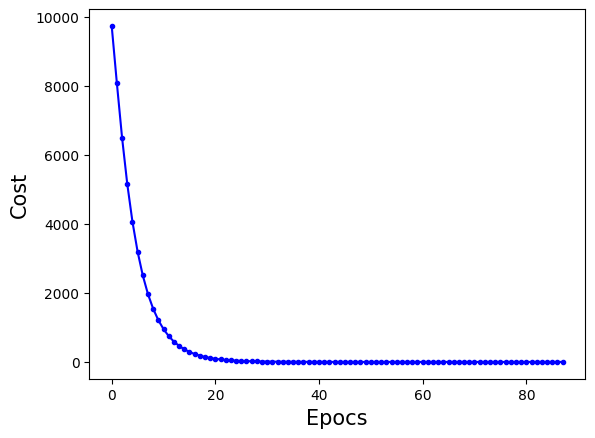

In [17]:
mini_batch_adam(x, y, alpha=0.01, batch=5, epochs=1000, b1=0.9, b2=0.999, eps=1e-8)